# Udacity: Solving Data Science Problems
## A jupyter notebook for investigating te Stackoverflow database

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## GATHERING DATA

In [2]:
df = pd.read_csv("survey_results_public.csv")

## ASSESSING DATA

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CLEAN DATA

Requirements: Select relevant attributes only and filter for the meaningful entries from the survey for each and every question.

* Selecting columns of interest for analysis
* Filter where PronounceGIF is not NULL so have statistical relevancy
* Summarize the PronounceGIF attribute in three categories: Hard G, Soft G, Other
* Add new attribute flagging european countries
* Add new attribute to define the underlying language family for european countries


In [4]:
# Filter for PronounceGIF is not NULL and filter for specific columns
columns = ['Respondent', 'Country', 'PronounceGIF']
data = df[df['PronounceGIF'].notna() == True]
data = data.filter(columns)

In [5]:
# Summarize the PronounceGIF attribute in three categories: Hard G, Soft G, Other
data['PronounceGIF'] = data['PronounceGIF'].apply(lambda x: 
    'Hard G like "gift"' if x == 'With a hard "g," like "gift"' else
    'Soft G like "jiff"' if x == 'With a soft "g," like "jiff"' else 'Other')

In [6]:
# Flagging European countries
# Split European countries to their Indo-European language family based on https://en.wikipedia.org/wiki/Indo-European_languages and https://www.theguardian.com/education/gallery/2015/jan/23/a-language-family-tree-in-pictures
# In order to facilitate the mapping for countries with many official langugages, picking the most used one for the language family grouping

germanic = ['Denmark', 'Sweden', 'Norway', 'Iceland', 'Netherlands', 'Scotland', 'United Kingdom', 'Switzerland', 'Luxembourg', 'Germany', 'Austria', 'Liechtenstein', ]
hellenic = ['Greece', 'Cyprus']
armenian = ['Armenia']
romance = ['France', 'Italy', 'Spain', 'Portugal', 'Romania', 'Malta', 'Belgium', 'Moldavia', 'Gibraltar']
baltic = ['Latvia', 'Lithuania']
slavic = ['Belarus', 'Russian Federation', 'Ukraine', 'Slovak Republic', 'Poland', 'Czech Republic', 'Croatia', 'Serbia', 'Bulgaria', 'Macedonia', 'Bosnia-Herzegovina', 'Slovenia', 'Montenegro']
albanian = ['Albania']
celtic = ['Ireland', 'Welsh']
uralic = ['Finland', 'Hungary', 'Estonia']
caucasian = ['Georgia', ]
altaic = ['Turkey']

def map_country_to_language_family(country):
    '''
    Maps the country to it's main language sub-family

    Parameters:
    country (object): an European country name
    
    Returns:
    object: a indo-european language sub-family name
    '''
    if country in germanic:
        return "germanic"
    elif country in hellenic:
        return "hellenic"
    elif country in armenian:
        return "armenian"
    elif country in romance:
        return "italic-romance"
    elif country in baltic:
        return "baltic"
    elif country in slavic:
        return "slavic"
    elif country in albanian:
        return "albanian"
    elif country in celtic:
        return "celtic"
    elif country in uralic:
        return "uralic"
    elif country in caucasian:
        return "caucasian"
    elif country in altaic:
        return"altaic"
    else : return "other"

european_countries = germanic + hellenic + armenian + romance + baltic + slavic + albanian + celtic + uralic + caucasian + altaic

data['is_european_country'] = data['Country'].apply(lambda x: True if x in european_countries else False)
data['european_language_family'] = data['Country'].apply(lambda x: map_country_to_language_family(x))


## TEST

In [7]:
data.head(10)

,Respondent,Country,PronounceGIF,is_european_country,european_language_family
0,1,United States,"Soft G like ""jiff""",False,other
1,2,United Kingdom,"Hard G like ""gift""",True,germanic
2,3,United Kingdom,"Hard G like ""gift""",True,germanic
3,4,United States,"Soft G like ""jiff""",False,other
4,5,Switzerland,"Soft G like ""jiff""",True,germanic
5,6,New Zealand,"Hard G like ""gift""",False,other
6,7,United States,"Hard G like ""gift""",False,other
7,8,Poland,"Hard G like ""gift""",True,slavic
8,9,Colombia,"Hard G like ""gift""",False,other
9,10,France,"Soft G like ""jiff""",True,italic-romance


## ANALYZE AND VISUALIZE

#### 1) What's the globally preferred way to pronounce .GIF

Total records: 51008
Pronounciation = 'Hard G': 33484
Pronounciation = 'Soft G': 13408
Pronounciation = 'Other': 4116


<AxesSubplot:>

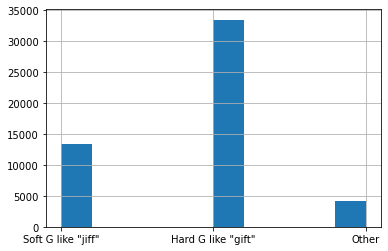

In [8]:
data_gif_vs_jif = data[['PronounceGIF']]

print("Total records:", data_gif_vs_jif.shape[0])
print("Pronounciation = 'Hard G':", data_gif_vs_jif[data_gif_vs_jif['PronounceGIF'] == 'Hard G like "gift"'].shape[0])
print("Pronounciation = 'Soft G':", data_gif_vs_jif[data_gif_vs_jif['PronounceGIF'] == 'Soft G like "jiff"'].shape[0])
print("Pronounciation = 'Other':", data_gif_vs_jif[data_gif_vs_jif['PronounceGIF'] == 'Other'].shape[0])

data_gif_vs_jif.PronounceGIF.hist()


We can clearly see that globally, it's the most correct to pronounce the .GIF data type with a hard G like "gift". However, I'm asking myself if the underlying langugage family could be linked to differences. In order to review a multitude of different branches of the language tree, we'll be filtering for european records only. 

#### 2) How do different branches of the indo-european languages pronounce .GIF?

In [9]:
# Filter for is_european_country = True to keep only european comments
data = data[data['is_european_country'] == True]

Total records: 22774
European pronounciation = 'Hard G': 17922
European pronounciation = 'Soft G': 4079
European pronounciation = 'Other': 773


<AxesSubplot:>

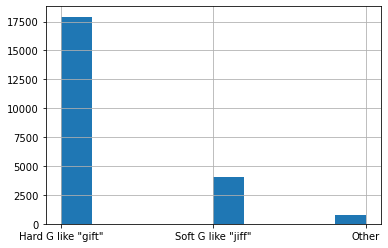

In [10]:
data_europe_gif_vs_jif = data[['PronounceGIF']]

print("Total records:", data_europe_gif_vs_jif.shape[0])
print("European pronounciation = 'Hard G':", data_europe_gif_vs_jif[data_europe_gif_vs_jif['PronounceGIF'] == 'Hard G like "gift"'].shape[0])
print("European pronounciation = 'Soft G':", data_europe_gif_vs_jif[data_europe_gif_vs_jif['PronounceGIF'] == 'Soft G like "jiff"'].shape[0])
print("European pronounciation = 'Other':", data_europe_gif_vs_jif[data_europe_gif_vs_jif['PronounceGIF'] == 'Other'].shape[0])

data_europe_gif_vs_jif.PronounceGIF.hist()

Text(0.5, 1.0, 'GIF pronounciation per European language family')

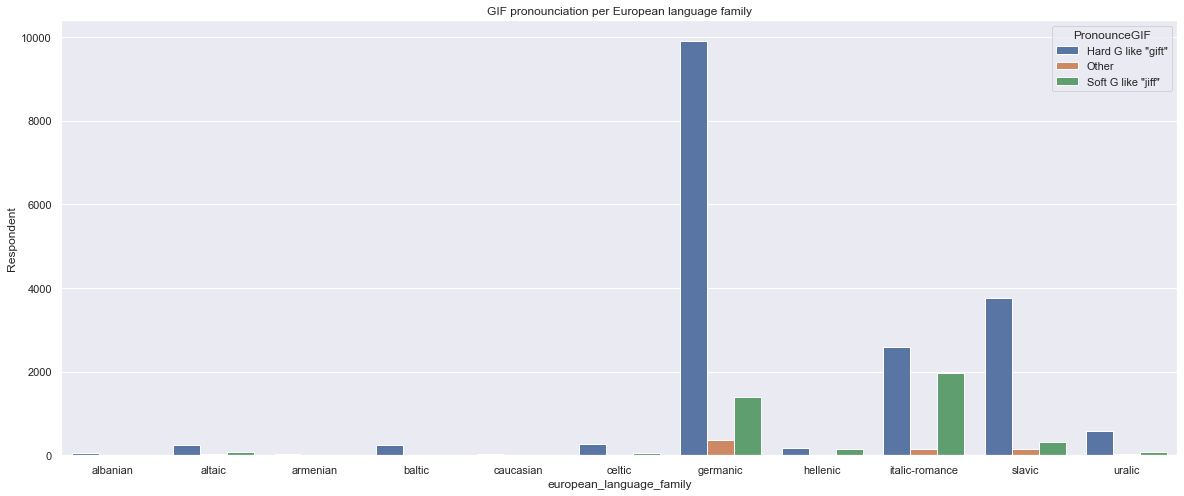

In [11]:


# Plotting how each of the european language families pronounce GIF
language_ponounciation = data.groupby(['european_language_family','PronounceGIF'])['Respondent'].count().reset_index()
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'european_language_family', y = 'Respondent', hue = 'PronounceGIF', data = language_ponounciation)
plt.title('GIF pronounciation per European language family')


The graph shows that pronouncing .GIF with a hard G is the most common way in Europe. Having said that we can identify that that germanic but most importantly italic romance language families tend to also use .GIF with a soft G. This can be explainable based on a specific language current pronounciation rules. In the French language, it would make sense the users use a  soft G pronounciation instinctively. It's common that a "g" follower by an "i" is being softened. For a hard G, it would require a "g" followed by an "u" and then an "i". Examples:

Soft G: Giffle 

Hard G: Guitarre 

For this reason I would like to investigate the italic romance survey results specifically. 

#### 3) How do italic romance dominant countries pronounce .GIF?

Text(0.5, 1.0, 'GIF pronounciation per italic-romance language family prominent countries')

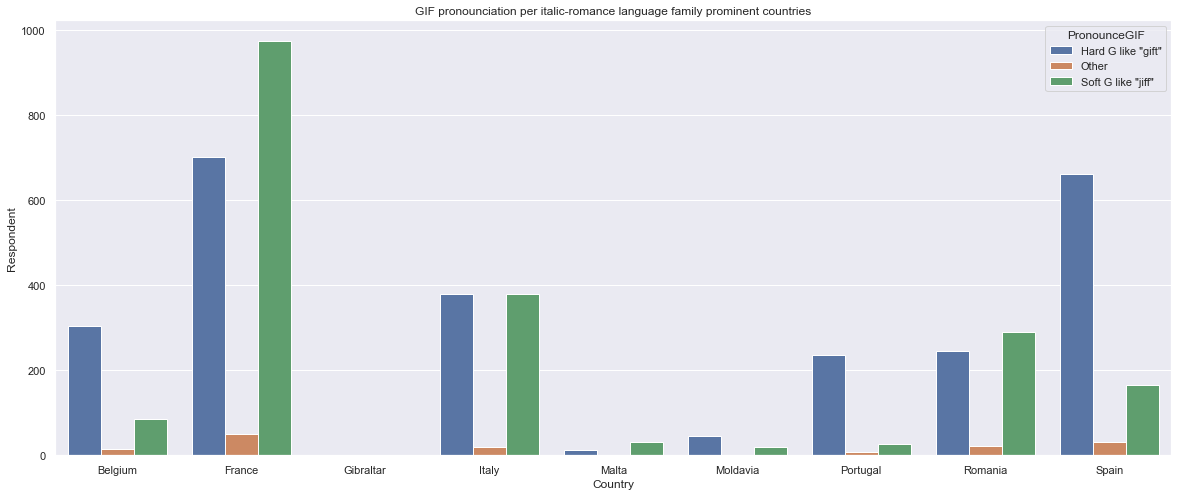

In [14]:
# Filtering for italic-romance languagge family
data_romance = data[data['european_language_family'] == "italic-romance"]

data_romance.head(5)

romance_language_ponounciation = data_romance.groupby(['Country','PronounceGIF'])['Respondent'].count().reset_index()
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Country', y = 'Respondent', hue = 'PronounceGIF', data = romance_language_ponounciation)
plt.title('GIF pronounciation per italic-romance language family prominent countries')


As expected, most countries with an own developed latin language tend to pronounce GIF with a soft G. Above graph shows that undeniably gallo-iberian (France), italo-dalmatian (Italy, Malta) and Romania. 

Same observation does not sustain for ibero-romance languages (Portugal, Spain). Left is Belgium, Moldavia and Gibraltar. 

These results may suggests that Belgium has been misclassified. For example Belgium could be a better fit for the Germanic group by following the franconian language subfamily with Afrikaans, Dutch and Flemish instead of the imposed French language. 

Moldavia has also been correctly classified to the romance language family according to Wikipedia (https://en.wikipedia.org/wiki/Moldovan_language). With it's big influence of slavic language family, it could count as an outlier.

For Gibraltar too little information is captured to be able to make an appropriate suggestion.

Generally, the most accepted way to pronounce .GIF globally is with a hahrd G. Same count for the whohle european continent. However, If someone would be european and pronouncing a soft G, it's very likely this individual uses a italic-romance language, especially out of the gallo-iberian or italo-dalmatian sub-family. 